<style>
h1{font-family: 'lucida handwriting'}
</style>
<center>

# **TP1** <br> Logique floue
</center>

### **CHERGUI Moad**  
IID3

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# **Exercice 1 :**

## 1. Définir la variable floue « Distance_to_next_car » sur l’univers de discours [0, 30]

In [2]:
Distance_to_next_car  = ctrl.Antecedent(np.arange(0, 30, 1), 'Distance_to_next_car') 

## 2. Création des cinq ensembles flous
### \+
## 3. modélisation des ensembles flous

In [3]:

Distance_to_next_car['v_small'] = fuzz.trimf(Distance_to_next_car.universe, [0, 0, 5])
Distance_to_next_car['small']   = fuzz.trapmf(Distance_to_next_car.universe, [0, 4, 8, 12])
Distance_to_next_car['perfect'] = fuzz.trapmf(Distance_to_next_car.universe, [8, 12, 18, 22])
Distance_to_next_car['big']     = fuzz.trapmf(Distance_to_next_car.universe, [18, 22, 26, 29])
Distance_to_next_car['v_big']   = fuzz.trimf(Distance_to_next_car.universe, [24, 29, 29])



## 4. Visualisation des fonctions d’appartenance 

c:\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


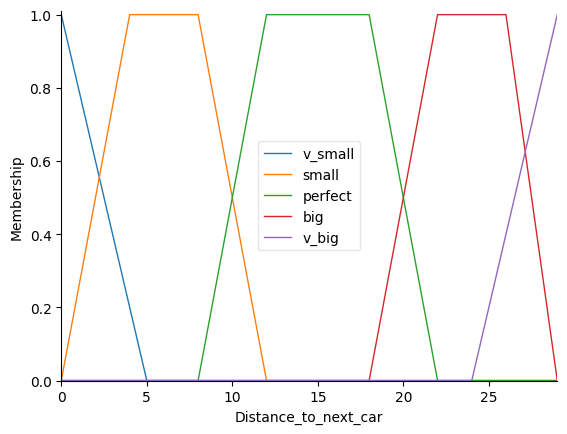

In [4]:
Distance_to_next_car.view()

# **Exercice 2 :**

## 1. Définir la variable floue Speed_change sur l’univers de discours [ -20, 20].

In [5]:

Speed_change = ctrl.Antecedent(np.arange(-20, 20, 1), 'Speed_change') 

## 2. Création des trois ensembles flous
### \+
## 3. modélisation des ensembles flous

In [6]:
Speed_change['declining'] = fuzz.trimf(Speed_change.universe, [-20, -20, 0])
Speed_change['constant']  = fuzz.trapmf(Speed_change.universe, [-10, -5, 5, 10])
Speed_change['growing']   = fuzz.trimf(Speed_change.universe, [0, 20, 20])


## 4. Tracer les fonctions d’appartenance de la variable Speed_change

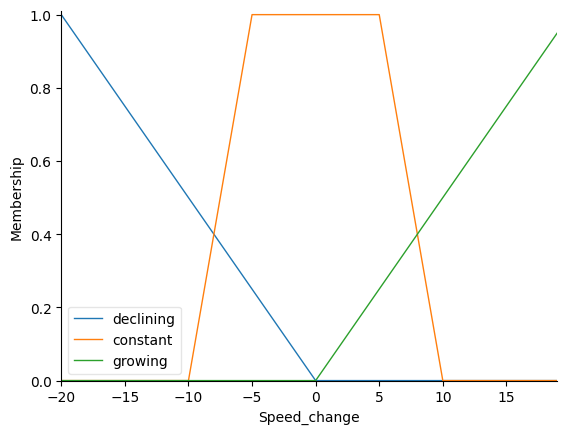

In [7]:
Speed_change.view()

# **Exercice 3 :**

## 1. Définir la variable de sortie Acceleration_Adjust sur l’univers de discours [ -3, 3].

In [8]:

Acceleration_Adjust = ctrl.Consequent(np.arange(-3, 3, 0.5), 'Acceleration_Adjust') 

## 2. Création des cinq ensembles flous
### \+
## 3. modélisation des ensembles flous

In [9]:
Acceleration_Adjust['neg_big'] = fuzz.trimf(Acceleration_Adjust.universe, [-3, -3, -1.5])
Acceleration_Adjust['neg_small'] = fuzz.trimf(Acceleration_Adjust.universe, [-2.5, -1.5, -0.5])
Acceleration_Adjust['zero'] = fuzz.trimf(Acceleration_Adjust.universe, [-1, 0, 1])
Acceleration_Adjust['pos_small'] = fuzz.trimf(Acceleration_Adjust.universe, [0.5, 1.5, 2.5])
Acceleration_Adjust['pos_big'] = fuzz.trimf(Acceleration_Adjust.universe, [1.5, 3, 3])

## 4. Tracer les fonctions d’appartenance de la variable Speed_change

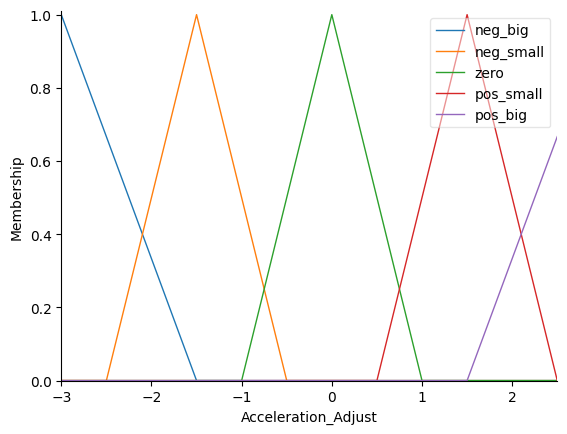

In [10]:
Acceleration_Adjust.view()

# **Exercice 4 :**

In [11]:

rule1 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['declining'], Acceleration_Adjust['neg_small'])
rule2 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['constant'], Acceleration_Adjust['neg_big'])
rule3 = ctrl.Rule(Distance_to_next_car['v_small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])
rule4 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['declining'], Acceleration_Adjust['zero'])
rule5 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['constant'], Acceleration_Adjust['neg_small'])
rule6 = ctrl.Rule(Distance_to_next_car['small'] & Speed_change['growing'], Acceleration_Adjust['neg_big'])
rule7 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['declining'], Acceleration_Adjust['pos_small'])
rule8 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['constant'], Acceleration_Adjust['zero'])
rule9 = ctrl.Rule(Distance_to_next_car['perfect'] & Speed_change['growing'], Acceleration_Adjust['neg_small'])
rule10 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule11 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['constant'], Acceleration_Adjust['pos_small'])
rule12 = ctrl.Rule(Distance_to_next_car['big'] & Speed_change['growing'], Acceleration_Adjust['zero'])
rule13 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['declining'], Acceleration_Adjust['pos_big'])
rule14 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['constant'], Acceleration_Adjust['pos_big'])
rule15 = ctrl.Rule(Distance_to_next_car['v_big'] & Speed_change['growing'], Acceleration_Adjust['pos_small'])


Acceleration_Adjust_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
Acceleration_Adjust_simulator= ctrl.ControlSystemSimulation(Acceleration_Adjust_ctrl)


## 2. simulation pour: <br>$\text{Distance\_to\_next\_car} = 13 \\et\\ \text{Speed\_change} = -2.5$

In [12]:
Acceleration_Adjust_simulator.input['Distance_to_next_car'] = 13
Acceleration_Adjust_simulator.input['Speed_change'] = -2.5

Acceleration_Adjust_simulator.compute()
print("Pour Distance_to_next_car = 13 et Speed_change = -2.5"+
      "\nAcceleration_Adjust estimée = "+
      str(Acceleration_Adjust_simulator.output['Acceleration_Adjust']))

Pour Distance_to_next_car = 13 et Speed_change = -2.5
Acceleration_Adjust estimée = 0.2738095238095238


## 3. visualisation

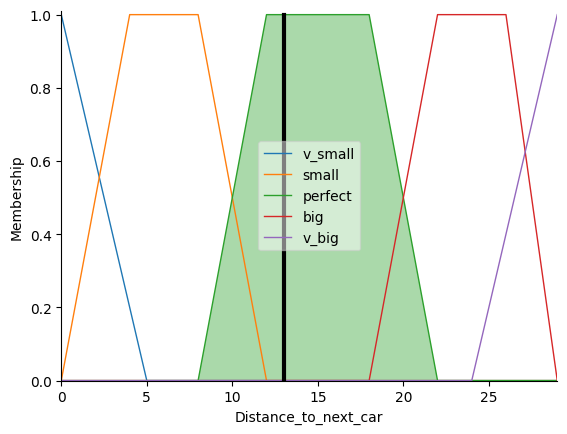

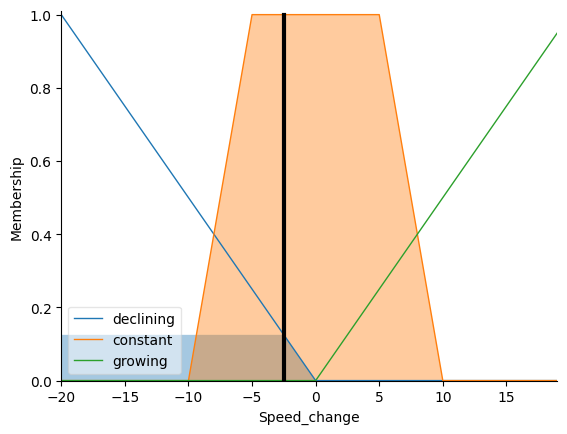

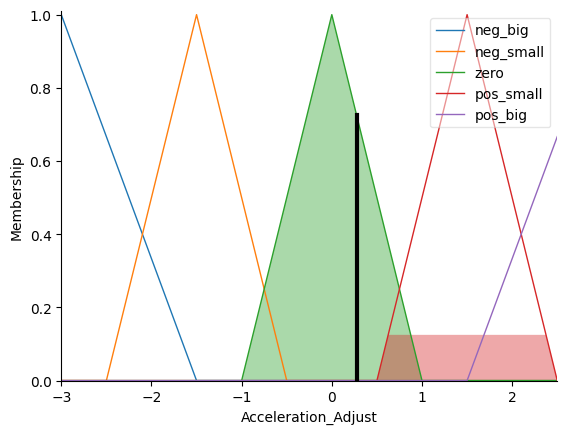

In [13]:
#En ajoutant sim=.., on indique que le graphique doit montrer la valeur d’entrée actuelle et l’effet sur la sortie.
Distance_to_next_car.view(sim=Acceleration_Adjust_simulator)
Speed_change.view(sim=Acceleration_Adjust_simulator)
Acceleration_Adjust.view(sim=Acceleration_Adjust_simulator)

---

<style>
h1{font-family: 'lucida handwriting'}
</style>
<center>

# **TP2:** <br> Logique floue et intégration du ML(suite)


</center>

**CHERGUI Moad**  
IID3

## 1. Générer un dataset synthétique

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:

n_samples = 1000
dist_samples = np.random.uniform(0, 30, n_samples)
speed_samples = np.random.uniform(-20, 20, n_samples)

accel_outputs = []
for d, s in zip(dist_samples, speed_samples):
    Acceleration_Adjust_simulator.input['Distance_to_next_car'] = float(d)
    Acceleration_Adjust_simulator.input['Speed_change'] = float(s)
    Acceleration_Adjust_simulator.compute()
    accel_outputs.append(float(Acceleration_Adjust_simulator.output['Acceleration_Adjust']))

df = pd.DataFrame({
    'Distance_to_next_car': dist_samples,
    'speed_change': speed_samples,
    'acceleration_adjust': accel_outputs
})

print(df.shape)
df.head()

(1000, 3)


,Distance_to_next_car,speed_change,acceleration_adjust
0,26.851912,8.369194,0.830947
1,8.908852,-9.931437,0.468909
2,28.840356,-3.222723,2.000013
3,13.984837,12.664342,-1.500000
4,4.448328,-4.752352,-1.158901


## 2. Entraînez ensuite un modèle de régression
### \+
## 3. Évaluez les performances du modèle

In [16]:
X = df[['Distance_to_next_car', 'speed_change']].values
y = df['acceleration_adjust'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE = ", mean_squared_error(y_test, y_pred))
print("MAE = ", mean_absolute_error(y_test, y_pred))

MSE =  0.001926024564636461
MAE =  0.027851589351313207


## 4. Quels avantages offre la logique floue (explicabilité) ?

La logique floue offre une explicabilité totale grâce à des règles linguistiques claires (si...alors...) facilement compréhensibles par les humains, permettant de tracer précisément comment chaque décision est prise sans nécessiter de données d'entraînement.



## 5. Quels avantages offre le ML (précision) ?

Le Machine Learning offre une précision supérieure en capturant automatiquement des relations complexes et non-linéaires dans les données, s'adaptant aux patterns réels et s'améliorant continuellement par réentraînement.
